<a href="https://colab.research.google.com/github/starohit/mlproject/blob/main/Forecast_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [25]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [26]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [27]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [28]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [29]:
df = pd.read_csv("/content/AAPL.csv")

In [30]:
#read_csv function from pandas

In [31]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680969,68445600
1,2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500
2,2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200
3,2023-04-18,166.100006,167.410004,165.649994,166.470001,165.586166,49923000
4,2023-04-19,165.800003,168.160004,165.539993,167.630005,166.740005,47720200
...,...,...,...,...,...,...,...
246,2024-04-05,169.589996,170.389999,168.949997,169.580002,169.580002,42055200
247,2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
248,2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200
249,2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [33]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,180.973466,182.442271,179.646773,181.137211,180.707308,5.748524e+07
std,9.024345,8.857779,8.936331,8.885207,8.911650,1.741735e+07
min,161.630005,165.279999,161.419998,163.759995,162.890533,2.404830e+07
25%,173.139999,174.485001,171.930001,173.615005,173.220246,4.670805e+07
50%,180.669998,182.229996,178.550003,180.710007,180.238220,5.363130e+07
75%,189.294999,189.990005,187.695000,189.334999,188.909805,6.267560e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [34]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [35]:
px.area(df, x="Date", y="Close")

In [36]:
px.line(df, x="Date", y="Close")

In [37]:
px.area(df, x="Date", y= "Volume")

# Understanding Facebook Prophet

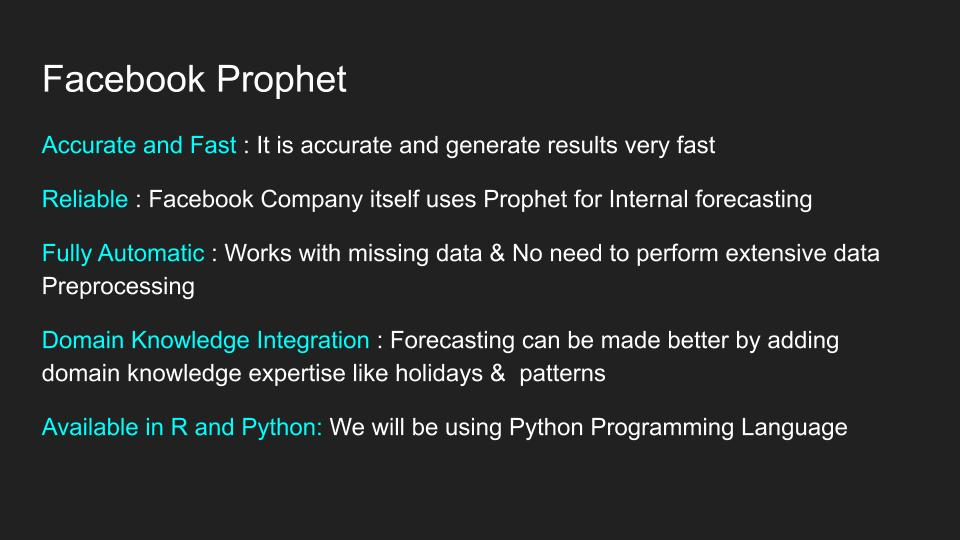

## Data Preperation

In [38]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680969,68445600
1,2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500
2,2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200
3,2023-04-18,166.100006,167.410004,165.649994,166.470001,165.586166,49923000
4,2023-04-19,165.800003,168.160004,165.539993,167.630005,166.740005,47720200
...,...,...,...,...,...,...,...
246,2024-04-05,169.589996,170.389999,168.949997,169.580002,169.580002,42055200
247,2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
248,2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200
249,2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300


In [39]:
columns = ['Date',"Close"]
ndf=pd.DataFrame(df, columns=columns)

In [40]:
ndf

,Date,Close
0,2023-04-13,165.559998
1,2023-04-14,165.210007
2,2023-04-17,165.229996
3,2023-04-18,166.470001
4,2023-04-19,167.630005
...,...,...
246,2024-04-05,169.580002
247,2024-04-08,168.449997
248,2024-04-09,169.669998
249,2024-04-10,167.779999


In [41]:
prophet_df=ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [42]:
prophet_df

,ds,y
0,2023-04-13,165.559998
1,2023-04-14,165.210007
2,2023-04-17,165.229996
3,2023-04-18,166.470001
4,2023-04-19,167.630005
...,...,...
246,2024-04-05,169.580002
247,2024-04-08,168.449997
248,2024-04-09,169.669998
249,2024-04-10,167.779999


## Creating Facebook Prophet Model

In [43]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoerw6rku/zwkmjycf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoerw6rku/upqz5ikx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68812', 'data', 'file=/tmp/tmpoerw6rku/zwkmjycf.json', 'init=/tmp/tmpoerw6rku/upqz5ikx.json', 'output', 'file=/tmp/tmpoerw6rku/prophet_modeldbedxi4d/prophet_model-20240413005229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [44]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [45]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-13,163.615682,158.461881,167.869817,163.615682,163.615682,-0.293280,-0.293280,-0.293280,-0.293280,-0.293280,-0.293280,0.0,0.0,0.0,163.322402
1,2023-04-14,163.934701,158.540057,168.724483,163.934701,163.934701,-0.198578,-0.198578,-0.198578,-0.198578,-0.198578,-0.198578,0.0,0.0,0.0,163.736123
2,2023-04-17,164.891756,159.916855,169.265757,164.891756,164.891756,-0.188416,-0.188416,-0.188416,-0.188416,-0.188416,-0.188416,0.0,0.0,0.0,164.703341
3,2023-04-18,165.210775,159.446250,169.947497,165.210775,165.210775,-0.348017,-0.348017,-0.348017,-0.348017,-0.348017,-0.348017,0.0,0.0,0.0,164.862758
4,2023-04-19,165.529794,160.186988,170.103250,165.529794,165.529794,-0.454905,-0.454905,-0.454905,-0.454905,-0.454905,-0.454905,0.0,0.0,0.0,165.074888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2024-05-07,160.748124,154.992699,165.576582,158.818428,162.884042,-0.348017,-0.348017,-0.348017,-0.348017,-0.348017,-0.348017,0.0,0.0,0.0,160.400107
277,2024-05-08,160.474450,154.607273,165.839146,158.424678,162.728977,-0.454905,-0.454905,-0.454905,-0.454905,-0.454905,-0.454905,0.0,0.0,0.0,160.019545
278,2024-05-09,160.200776,154.548216,165.587242,158.001404,162.634498,-0.293280,-0.293280,-0.293280,-0.293280,-0.293280,-0.293280,0.0,0.0,0.0,159.907496
279,2024-05-10,159.927102,154.524195,165.768944,157.555310,162.471618,-0.198578,-0.198578,-0.198578,-0.198578,-0.198578,-0.198578,0.0,0.0,0.0,159.728524


In [46]:
px.line(forecast, x='ds', y="yhat")

##Downloading the Forecast data

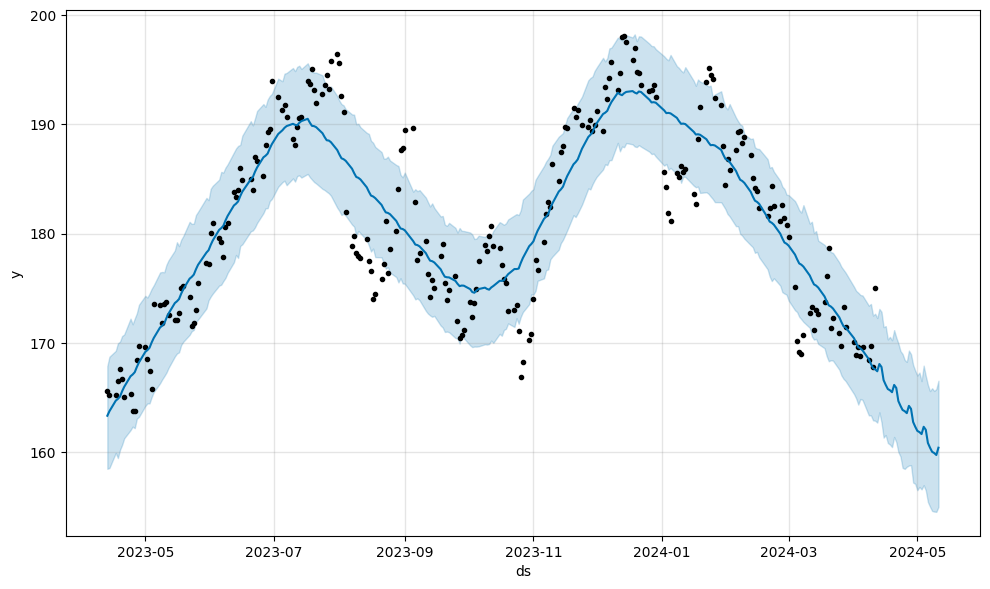

In [47]:
figure=m.plot(forecast,xlabel='ds', ylabel="y")

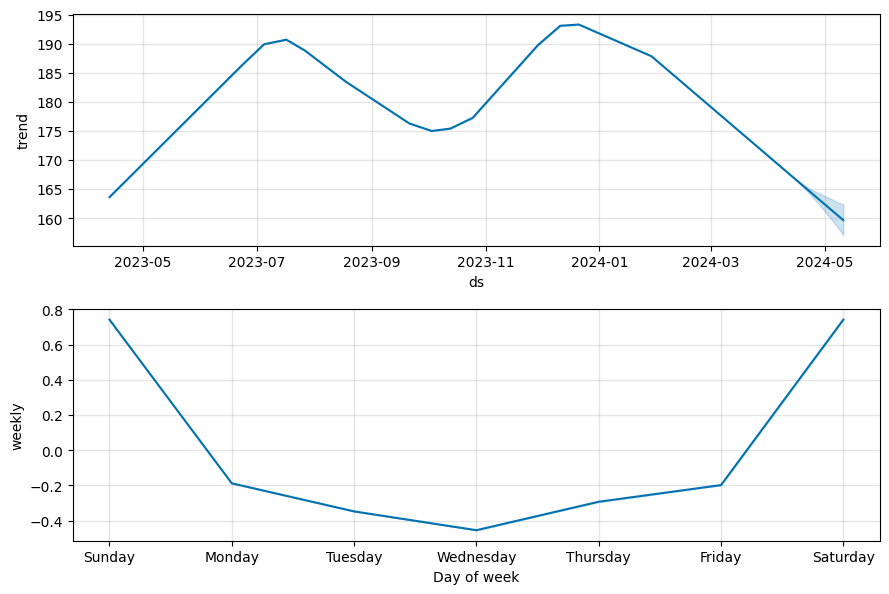

In [48]:
figure2=m.plot_components(forecast)

In [49]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>